# Bike sharing case study - Assignment using MLR


### Business Objective

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands













## STEP 1 - Reading and Understanding the Data

In [624]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import calendar
%matplotlib inline

In [625]:
#Importing dataset
df = pd.read_csv('day.csv')

# Check the head of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [626]:
df.shape

(730, 16)

In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### * Inferences : There are 730 rows and 16 columns and no null values in any columns * 

In [628]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## STEP 2 - Data Cleaning / Pre processing

In [629]:
# Drop columns that are not useful ( as mentioned in the assignment lecture and intro)

# Droping instant column / index column 
df.drop(['instant'], axis = 1, inplace = True)

# Dropping casual and registered columns
df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)

In [630]:
# Check for duplicates
df_duplicate = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_duplicate.drop_duplicates(subset=None, inplace=True)

df_duplicate.shape

(730, 13)

In [631]:
# percentage of missing values in each column
round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)

dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

In [632]:
# percentage of missing values in each row
round(100*(df.isnull().sum(axis=1)/len(df)), 2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

### * Inferences :  no duplictes as size of both data frames after droppong dupicates is same

In [633]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [634]:
df = df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## STEP 3 -  Visualising the Data / EDA

1. Check if all the variables are linearly related or not 
2. Checking if there are any multicollinearity 
3. identify predictors that are directly having a strong correlation with the target variable "cnt"

### Visualising Numeric Variables : Using a pairplot 

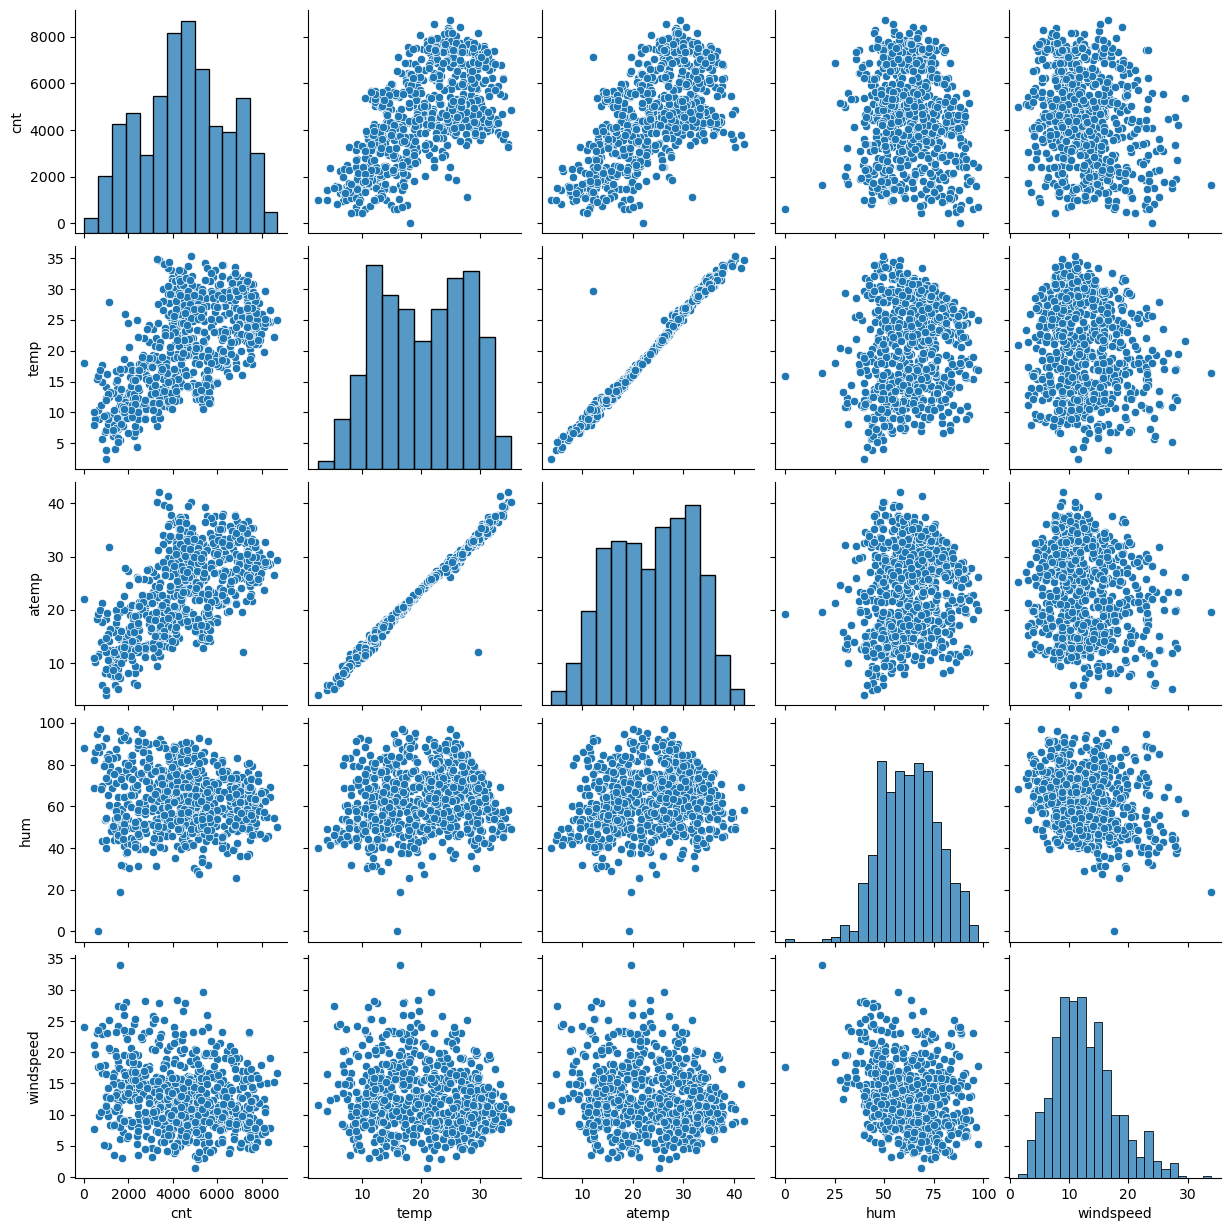

In [635]:
sns.pairplot(data=df, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### * Inferences : Linear model can be considered as atemp, temp show positive correlation with target variable 
By visualising the numeric variables, we can conclude that a linear model can be considered in this case because there are atleast some independent variables like atemp , temp etc. that show a positive correlation with the target variable cnt .

### Visualising Categorical Variables : Using a boxplot

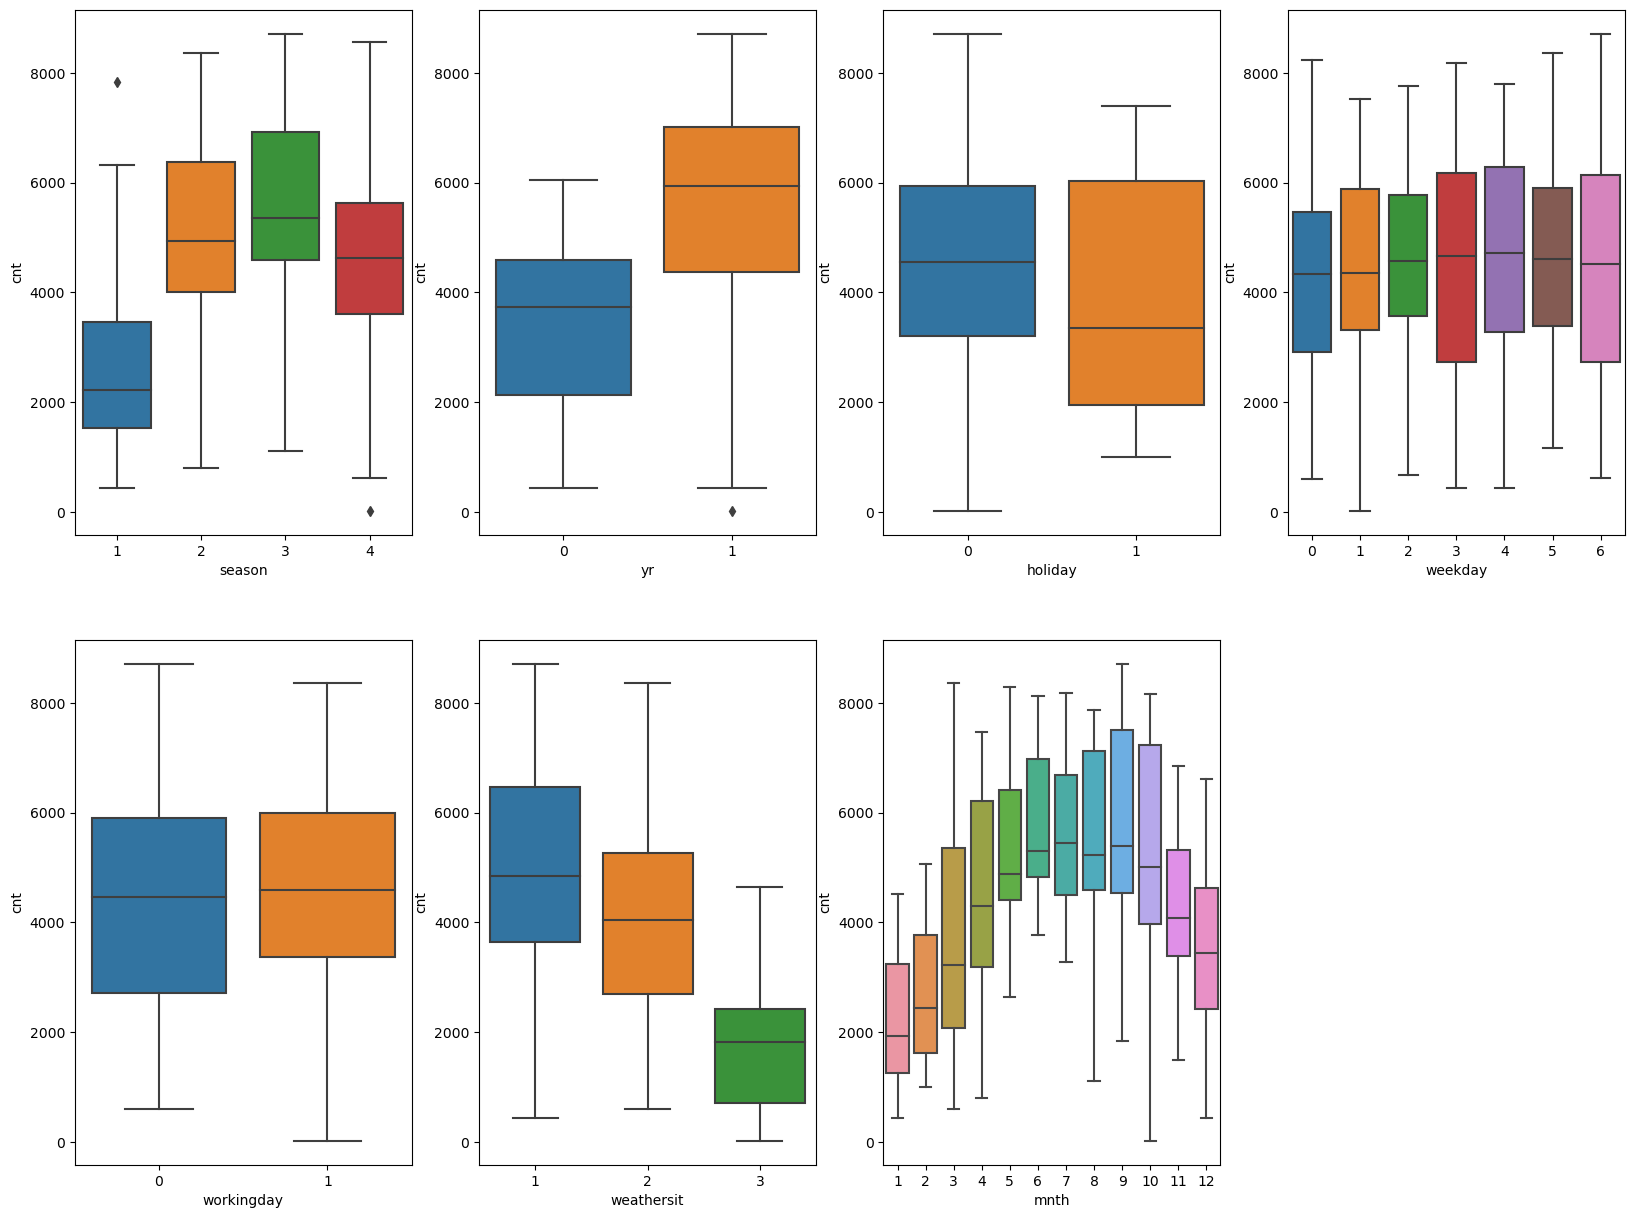

In [636]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.show()

### * Inferences : 

1. For the variable season, category 3 : Fall, has the highest median, which shows that the demand was high during this season. It is least for 1: spring.
2. The year 2019 had a higher count of users as compared to the year 2018.
3. There are no users when there is heavy rain/ snow indicating that this weather is quite adverse. 
4. Highest count is when the weather situation was Clear, Partly Cloudy.
5. The number of rentals peaked in September, whereas they peaked in December.
6. In December, rentals have declined.
7. The count is less during the holidays.
8. From the "Workingday" boxplot we can see those maximum bookings happening between 4000 and 6000, that is the median count of users is constant almost throughout the week. 
9. There is not much of difference in booking whether its working day or not.

## STEP 4 - Preparing data for the model


In [637]:
# Maping months
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])

In [638]:
# Maping seasons as mentioned in the data dictionary
df.season = df.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [639]:
# Mapping weathersit
df.weathersit = df.weathersit.map({1:'Clear',2:'Mist & Cloudy', 3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [640]:
# Mapping Weekday
df.weekday = df.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [641]:
# Check the head of the dataset
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [642]:
# Create DUMMY variables for mnth, weekday, season & weathersit
dummy = df[['season','mnth','weekday','weathersit']]
dummy = pd.get_dummies(dummy,drop_first=True)
dummy

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [643]:
# Add dummy variables 
df = pd.concat([dummy,df],axis = 1)

In [644]:
# Delete orginal columns mnth, weekday, season & weathersit
df.drop(['season', 'weathersit', 'weekday', 'mnth'],axis=1,inplace=True)
df.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [645]:
df.shape

(730, 30)

In [646]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    uint8  
 1   season_Summer                 730 non-null    uint8  
 2   season_Winter                 730 non-null    uint8  
 3   mnth_Aug                      730 non-null    uint8  
 4   mnth_Dec                      730 non-null    uint8  
 5   mnth_Feb                      730 non-null    uint8  
 6   mnth_Jan                      730 non-null    uint8  
 7   mnth_Jul                      730 non-null    uint8  
 8   mnth_Jun                      730 non-null    uint8  
 9   mnth_Mar                      730 non-null    uint8  
 10  mnth_May                      730 non-null    uint8  
 11  mnth_Nov                      730 non-null    uint8  
 12  mnth_Oct                      730 non-null    uint8  
 13  mnth_

### * Inferences : After adding dummies, There are 730 rows and 30 columns 

## STEP 5 - Splitting the Data into Training and Testing Sets

In [647]:
train, test = train_test_split(df, train_size = 0.7, random_state = 100)

In [648]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,10.489153,11.5850,48.3333,23.500518,1796
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,15.443347,18.8752,48.9583,8.708325,4220
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,13.803347,16.0977,72.9583,14.707907,1683


In [649]:
print(train.shape)
print(test.shape)

(510, 30)
(220, 30)


In [650]:
# Rescaling varibles - MinMax scaling (0-1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [651]:
# Apply scaler() to all the columns except the 'dummy' variables.
temp = ['cnt','hum','windspeed','temp','atemp']

#Fit - Transfor model training dataset 
train[temp] = scaler.fit_transform(train[temp])

In [652]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [653]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.029412,0.345098,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.169124,0.475867,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### * Inferences : All units of the coefficients obtained are all on the same scale

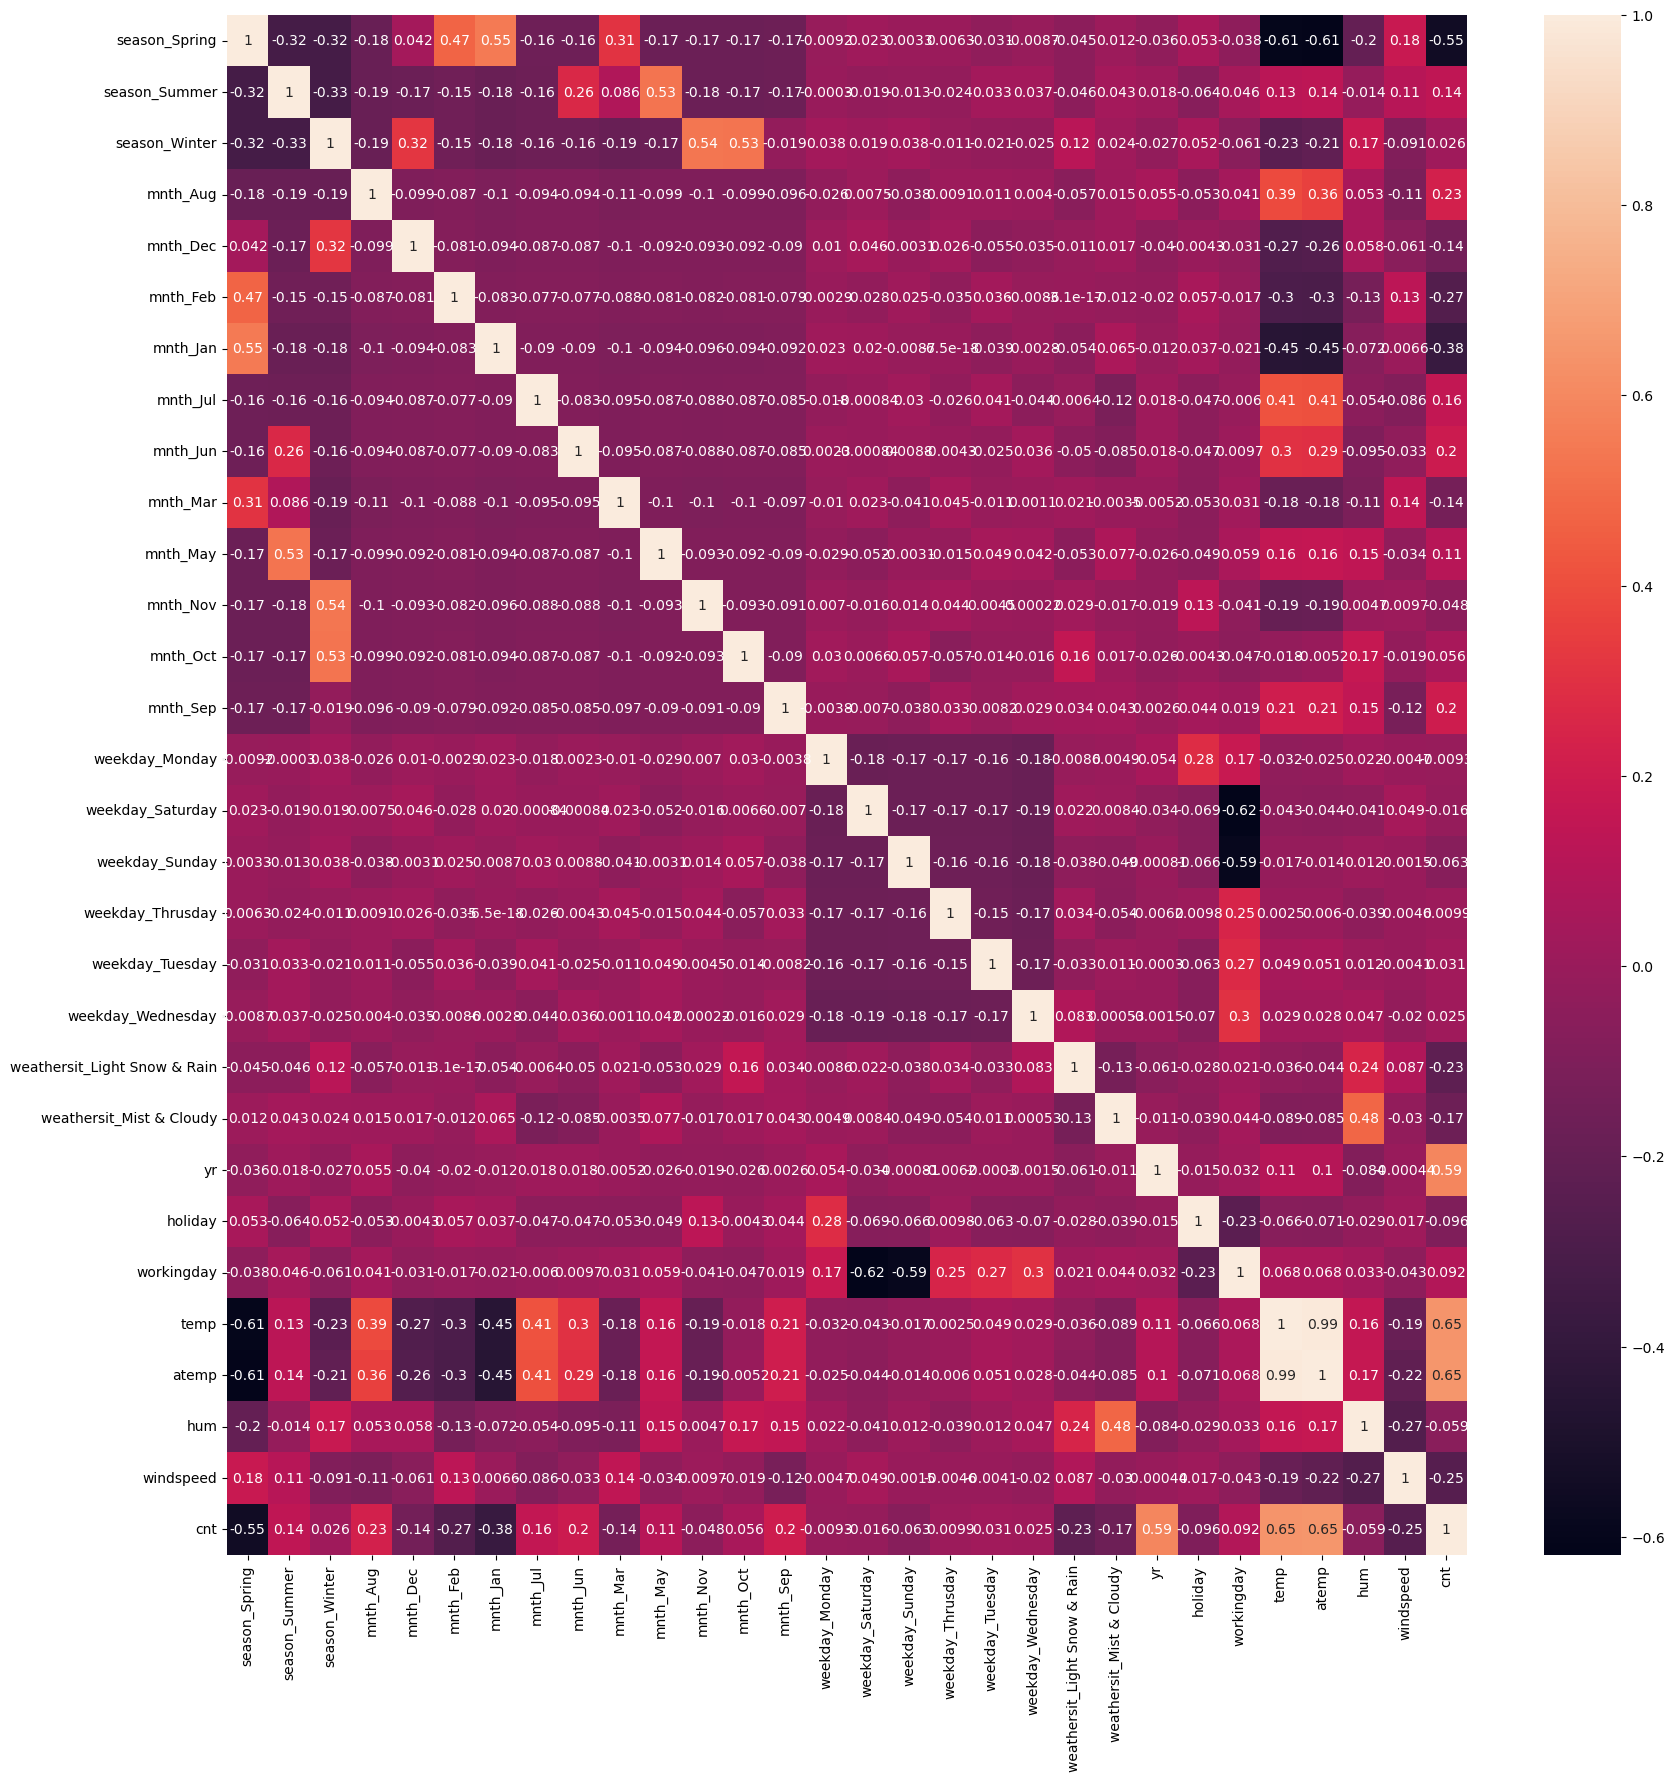

In [654]:
# Corellation check 

plt.figure(figsize = (20, 20))
sns.heatmap(train.corr(), annot = True)
plt.show()

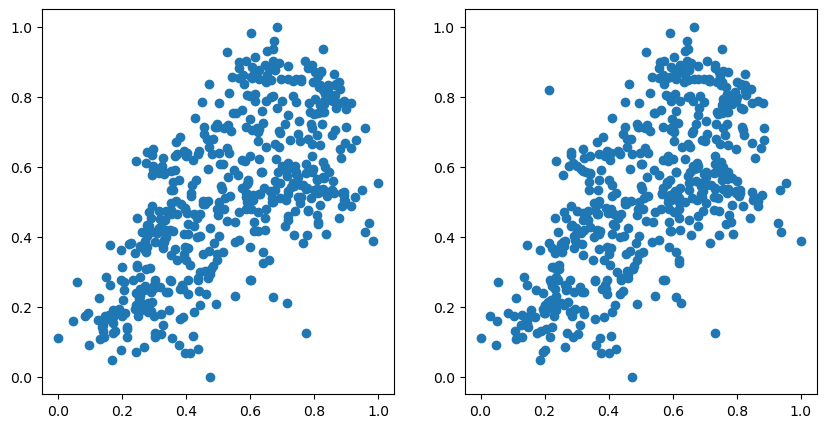

In [655]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.scatter(train.temp, train.cnt)
plt.subplot(1,2,2)
plt.scatter(train.atemp, train.cnt)
plt.show()

### * Inferences : atemp and temp seems to be poitively correlated to the target variable cnt.

In [656]:
# Dividing into X and Y sets for the model building

y_train = train.pop('cnt') # EXclude target var 
X_train = train

In [657]:
y_train.shape

(510,)

## STEP 6 - Building a linear model

### Approach - Automated (RFE) + Manual (statsmodel )

In [658]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [659]:
# Feature Selection (15 variables)
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [660]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 7),
 ('weekday_Thrusday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [661]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [662]:
X_train.columns[~rfe.support_]


Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

### Using statsmodel for the detailed statistics

In [663]:
import statsmodels.api as sm

In [664]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [665]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_rfe)

X_train_lm.head()


,const,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
576,1.0,0,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475
111,1.0,0,1,0,0,0,0,0,0,1,0,0,1,0.345824,0.751824,0.380981


In [666]:
# Building the first linear models using statsmodels

In [667]:
lm_1 = sm.OLS(y_train, X_train_lm).fit()
lm_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          4.22e-191
Time:                        00:42:45   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2519      0.036      6.969      0.000       0.181       0.323
season_Spring                   -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_Summer                    0.0508      0.015      3.423      0.001       0.022       0.080
season_Winter                    0.0933      0.017      5.403      0.000       0.059       0.127
mnth_Jan                        -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_Jul                        -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_Sep                         0.0814      0.016      4.945      0.000       0.049       0.114
weekday_Saturday                 0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_Light Snow & Rain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_Mist & Cloudy        -0.0563      0.010     -5.439      0.000      -0.077      -0.036
yr                               0.2305      0.008     28.795      0.000       0.215       0.246
holiday                         -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday                       0.0433      0.012      3.762      0.000       0.021       0.066
temp                             0.5096      0.034     14.837      0.000       0.442       0.577
hum                             -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                       -0.1863      0.025     -7.310      0.000      -0.236      -0.136
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### * Inferences :p-value for all the variables is < 0.05

In [668]:
# Checking VIF for multicollinearity

In [669]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [670]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
13,hum,29.37
12,temp,17.78
11,workingday,5.31
14,windspeed,4.73
0,season_Spring,4.53
2,season_Winter,3.46
1,season_Summer,2.85
8,weathersit_Mist & Cloudy,2.29
9,yr,2.09
6,weekday_Saturday,1.98


### * Drop feature hum having highest VIF > 5 , one by one


In [671]:
# dropping hum (hum	29.37)
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)


### Model 2

In [672]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.60e-188
Time:                        00:42:45   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1737      0.031      5.520      0.000       0.112       0.235
season_Spring                   -0.0599      0.021     -2.867      0.004      -0.101      -0.019
season_Summer                    0.0445      0.015      2.967      0.003       0.015       0.074
season_Winter                    0.0784      0.017      4.562      0.000       0.045       0.112
mnth_Jan                        -0.0392      0.018     -2.227      0.026      -0.074      -0.005
mnth_Jul                        -0.0479      0.018     -2.614      0.009      -0.084      -0.012
mnth_Sep                         0.0755      0.017      4.527      0.000       0.043       0.108
weekday_Saturday                 0.0583      0.015      3.968      0.000       0.029       0.087
weathersit_Light Snow & Rain    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
weathersit_Mist & Cloudy        -0.0813      0.009     -9.437      0.000      -0.098      -0.064
yr                               0.2345      0.008     29.009      0.000       0.219       0.250
holiday                         -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday                       0.0464      0.012      3.966      0.000       0.023       0.069
temp                             0.4722      0.034     14.005      0.000       0.406       0.538
windspeed                       -0.1563      0.025     -6.286      0.000      -0.205      -0.107
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [673]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.68
0,season_Spring,3.07
1,season_Summer,2.34
9,yr,2.08
2,season_Winter,1.98
6,weekday_Saturday,1.97
3,mnth_Jan,1.62
4,mnth_Jul,1.59


In [674]:
# dropping (temp	7.07)
X_train_rfe = X_train_rfe.drop(['temp'], axis=1)


### Model 3

In [675]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train, X_train_lm).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          6.44e-154
Time:                        00:42:45   Log-Likelihood:                 425.63
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.5444      0.020     27.118      0.000       0.505       0.584
season_Spring                   -0.2602      0.018    -14.483      0.000      -0.296      -0.225
season_Summer                   -0.0427      0.016     -2.651      0.008      -0.074      -0.011
season_Winter                   -0.0762      0.016     -4.903      0.000      -0.107      -0.046
mnth_Jan                        -0.1026      0.020     -5.112      0.000      -0.142      -0.063
mnth_Jul                        -0.0095      0.021     -0.446      0.656      -0.052       0.032
mnth_Sep                         0.0710      0.020      3.610      0.000       0.032       0.110
weekday_Saturday                 0.0562      0.017      3.243      0.001       0.022       0.090
weathersit_Light Snow & Rain    -0.3034      0.029    -10.593      0.000      -0.360      -0.247
weathersit_Mist & Cloudy        -0.0882      0.010     -8.688      0.000      -0.108      -0.068
yr                               0.2478      0.009     26.153      0.000       0.229       0.266
holiday                         -0.0567      0.032     -1.757      0.080      -0.120       0.007
workingday                       0.0478      0.014      3.466      0.001       0.021       0.075
windspeed                       -0.1878      0.029     -6.426      0.000      -0.245      -0.130
==============================================================================
Omnibus:                       34.639   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.598
Skew:                          -0.421   Prob(JB):                     3.46e-15
Kurtosis:                       4.557   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [676]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
12,windspeed,4.27
11,workingday,3.83
0,season_Spring,2.97
1,season_Summer,2.29
2,season_Winter,1.98
9,yr,1.91
6,weekday_Saturday,1.69
3,mnth_Jan,1.60
8,weathersit_Mist & Cloudy,1.57
4,mnth_Jul,1.30


In [677]:
# dropping mnth_Jul
X_train_rfe = X_train_rfe.drop(['mnth_Jul'], axis=1)


### Model 4

In [678]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_4 = sm.OLS(y_train, X_train_lm).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          5.73e-155
Time:                        00:42:45   Log-Likelihood:                 425.53
No. Observations:                 510   AIC:                            -825.1
Df Residuals:                     497   BIC:                            -770.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.5406      0.018     29.655      0.000       0.505       0.576
season_Spring                   -0.2568      0.016    -15.797      0.000      -0.289      -0.225
season_Summer                   -0.0393      0.014     -2.768      0.006      -0.067      -0.011
season_Winter                   -0.0730      0.014     -5.303      0.000      -0.100      -0.046
mnth_Jan                        -0.1027      0.020     -5.118      0.000      -0.142      -0.063
mnth_Sep                         0.0737      0.019      3.933      0.000       0.037       0.111
weekday_Saturday                 0.0564      0.017      3.254      0.001       0.022       0.090
weathersit_Light Snow & Rain    -0.3035      0.029    -10.606      0.000      -0.360      -0.247
weathersit_Mist & Cloudy        -0.0879      0.010     -8.685      0.000      -0.108      -0.068
yr                               0.2478      0.009     26.179      0.000       0.229       0.266
holiday                         -0.0563      0.032     -1.746      0.081      -0.120       0.007
workingday                       0.0481      0.014      3.489      0.001       0.021       0.075
windspeed                       -0.1877      0.029     -6.429      0.000      -0.245      -0.130
==============================================================================
Omnibus:                       34.767   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.525
Skew:                          -0.424   Prob(JB):                     3.58e-15
Kurtosis:                       4.553   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [679]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
11,windspeed,4.12
10,workingday,3.54
0,season_Spring,2.68
1,season_Summer,2.01
8,yr,1.89
2,season_Winter,1.78
5,weekday_Saturday,1.62
3,mnth_Jan,1.60
7,weathersit_Mist & Cloudy,1.57
4,mnth_Sep,1.20


### * Inferences : p-value for all the variables is < 0.05 and VIF also is under 5. VIFs and p-values both are within an acceptable range. 

## Hence, we finalise Model 4 (lm_4) as the final model for future prdeictions.

## STEP 7 - Residual Analysis of the train data

C:\Users\prashant\AppData\Local\Temp\ipykernel_10804\3513160039.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


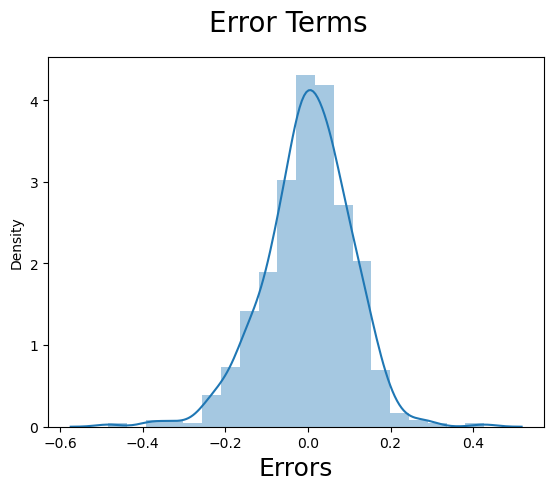

In [680]:
# check if the error terms are also normally distributed
y_train_pred = lm_4.predict(X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

### * Inferences : Error terms are centred around 0 and follows a normal distribution

## STEP 8 - Making Predictions Using the Final Model

In [681]:
temp = ['cnt','hum','windspeed','temp','atemp']

test[temp] = scaler.transform(test[temp])

In [682]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.027273,0.318182,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.163248,0.466833,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [683]:
# Dividing into X_test and y_test

In [684]:
y_test = test.pop('cnt')
X_test = test

In [685]:
# Making predictions using the final model

X_test = sm.add_constant(X_test[X_train_rfe.columns])
y_test_pred = lm_4.predict(X_test)

### Calculating the r-squared

In [686]:
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.7804505628068954
r2_score of test dataset 0.7400661330012526


### * Inferences : r2_score of train dataset 0.7804505628068954 / r2_score of test dataset 0.7400661330012526



## STEP 9 - Model Evaluation

Text(0, 0.5, 'y_pred')

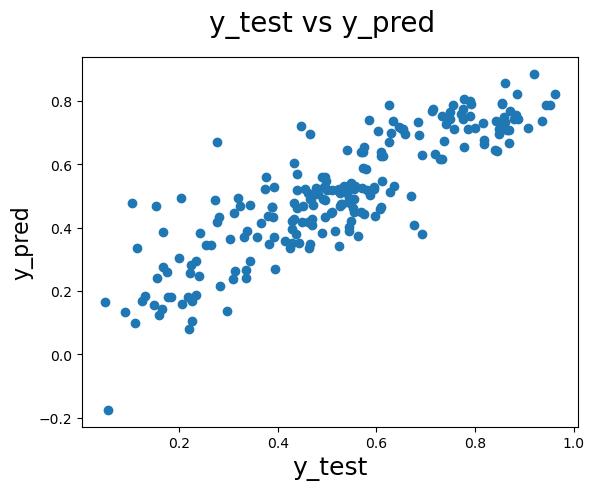

In [687]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

### * Inferences : Model 4 is fitting on the test data set in a linear manner


# CONCLUSION

In [688]:
# Final equation of the best fitted line

In [689]:
param = pd.DataFrame(lm_4.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,13))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
0,const,0.540639
9,yr,0.247820
5,mnth_Sep,0.073690
6,weekday_Saturday,0.056388
11,workingday,0.048053
2,season_Summer,-0.039325
10,holiday,-0.056258
3,season_Winter,-0.072982
8,weathersit_Mist & Cloudy,-0.087864


### * Inferences : Equation for best fitted line is : cnt = 0.540639 + 0.24782 x yr + 0.07369 x mnth_Sep + 0.056388 x weekday_Saturday + 0.048053 x workingday + -0.039325 x season_Summer-0.056258 x holiday-0.072982 x season_Winter-0.087864 x weathersit_Mist & Cloudy-0.102669 x mnth_Jan-0.187707 x windspeed-0.256802 x season_Spring-0.303522 x weathersit_Light Snow & Rain



### * Inferences :  All the positive coefficients like yr, mnth_Sep indicate that an increase in these values will lead to an increase in the value of cnt.


### * Inferences : All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt

### * Inferences : From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 74 % of bike demand.

### * Inferences : Top three features contributing significantly towards explaining the demand are: 
1. yr (0.247820), 
2. weathersit_Light Snow & Rain (-0.256802)
3. season_Spring  (-0.303522)

### * Inferences : Hence, it can be  concluded that the variables yr,  weathersit_Light Snow & Rain and season_Spring are significant in predicting the demand for shared bikes .